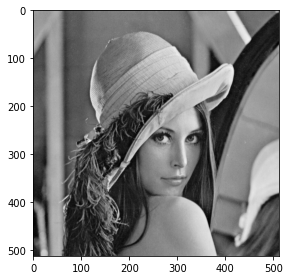

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

lena = cv2.imread("./lena.bmp", 0)

plt.imshow(lena, cmap="gray")
plt.tight_layout()
plt.show()

In [9]:
# 在左與上padding 0
lena_ = np.hstack((np.zeros((512,1)),lena))  #沿著水平方向將數組堆疊起來
lena_ = np.vstack((np.zeros((1,513)),lena_)) #沿著垂直方向將數組堆疊起來

In [10]:
#去掉右與下的部分(將圖片往右下角移的意思)
#translate lena.bmp one pixel to the right and downward.
lena_shift = lena_[:512,:512]
lena_shift

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 162., 162., ..., 171., 170., 155.],
       [  0., 162., 162., ..., 171., 170., 155.],
       ...,
       [  0.,  46.,  46., ..., 100., 102.,  98.],
       [  0.,  43.,  43., ..., 100., 104., 100.],
       [  0.,  44.,  44., ..., 100., 104., 105.]])

In [15]:
from scipy.ndimage import convolve
from matplotlib.pyplot import figure, draw, gca

HSKERN = np.array([[1/12, 1/6, 1/12],
                   [1/6,    0, 1/6],
                   [1/12, 1/6, 1/12]], float)

kernelX = np.array([[-1, 1],
                    [-1, 1]]) * .25  # kernel for computing d/dx

kernelY = np.array([[-1, -1],
                    [1, 1]]) * .25  # kernel for computing d/dy

kernelT = np.ones((2, 2))*.25 
    
def HornSchunck(im1, im2, lam=1, Niter=8):
    
    im1 = im1.astype(np.float32)
    im2 = im2.astype(np.float32)

    # set up initial velocities
    uInitial = np.zeros([im1.shape[0], im1.shape[1]])
    vInitial = np.zeros([im1.shape[0], im1.shape[1]])

    # Set initial value for the flow vectors
    U = uInitial
    V = vInitial

    # Estimate derivatives
    [fx, fy, ft] = computeDerivatives(im1, im2)

    for _ in range(Niter):
        uAvg = convolve(U, HSKERN)
        vAvg = convolve(V, HSKERN)
        der = (fx*uAvg + fy*vAvg + ft) / (1+ lam*(fx**2 + fy**2))
        U = uAvg - fx * der
        V = vAvg - fy * der

    return U, V


def computeDerivatives(im1, im2):

    fx = convolve(im1, kernelX) + convolve(im2, kernelX)
    fy = convolve(im1, kernelY) + convolve(im2, kernelY)

    # ft = im2 - im1
    ft = convolve(im1, kernelT) + convolve(im2, -kernelT)

    return fx, fy, ft

def compareGraphs(u, v, Inew, scale=5, quivstep=20, lam=10, Niter=10):
    ax = figure(figsize=(16,16)).gca()
    ax.imshow(Inew, cmap='gray')
    for i in range(0, u.shape[0], quivstep):
        for j in range(0, v.shape[1], quivstep):
            ax.arrow(j, i, v[i, j]*scale, u[i, j]*scale, color='red',
                     head_width=3, head_length=1,width=0.0001)
    ax.set_title("Lambda:{}, iterations:{}".format(lam, Niter))
    ax.axis((0,512,512,0))
    ax.plot(clip_on=True)

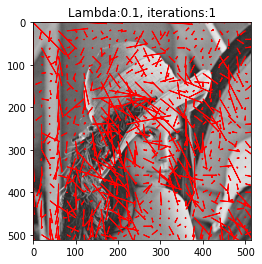

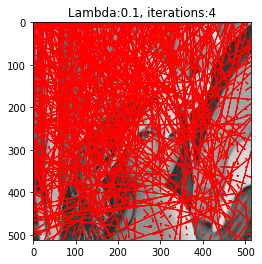

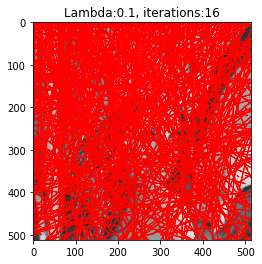

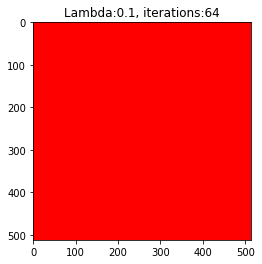

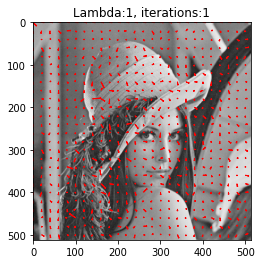

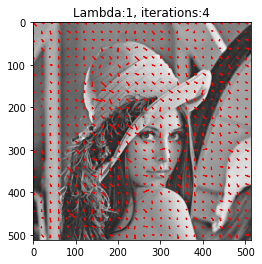

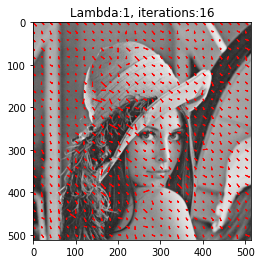

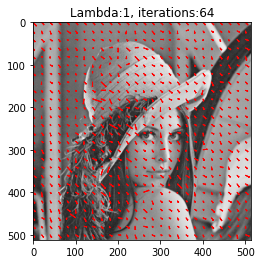

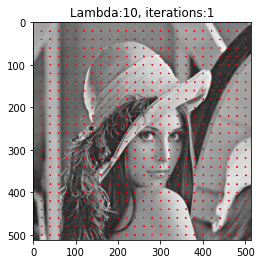

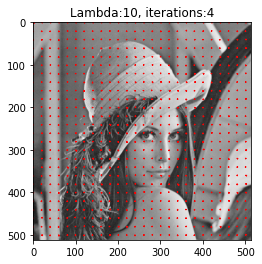

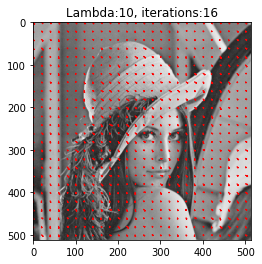

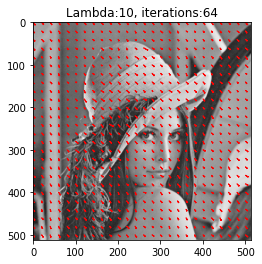

In [116]:
Lambdas = [0.1, 1, 10]
iterations = [1, 4, 16, 64]

for lam in Lambdas:
    for Niter in iterations:
        
        U, V = HornSchunck(lena, lena_shift, lam=lam, Niter=Niter)

        compareGraphs(U, V, lena_shift,lam=lam, Niter=Niter)

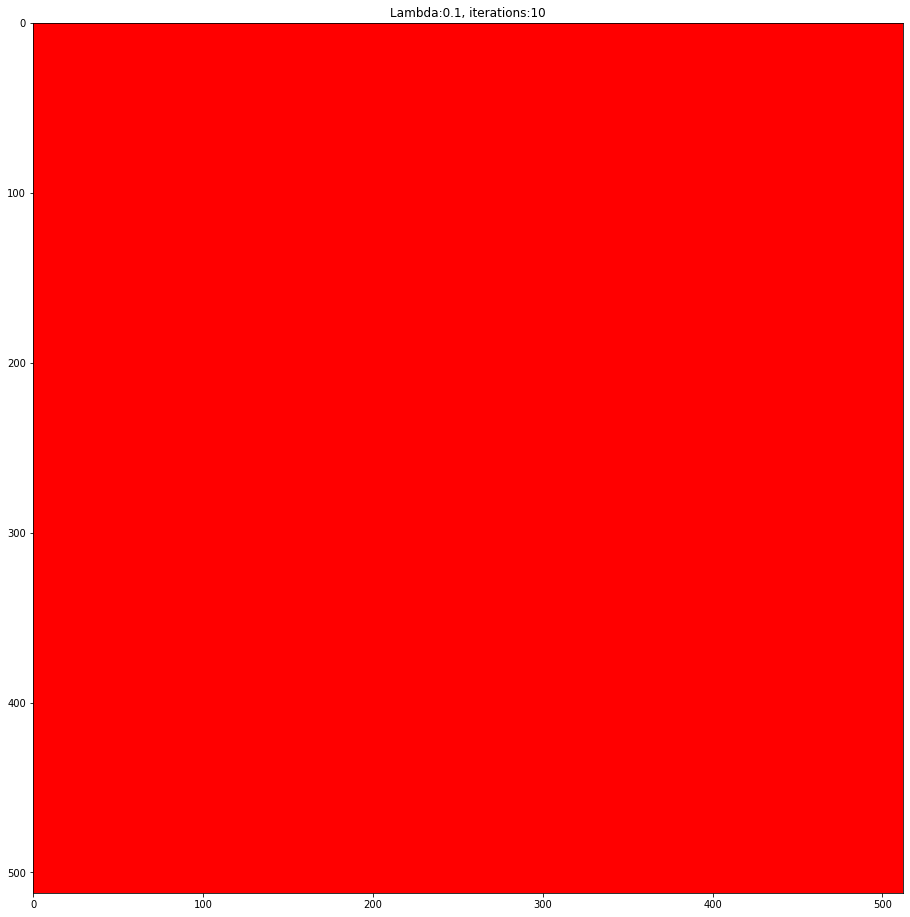

In [22]:
lam = 0.1
U, V = HornSchunck(lena, lena_shift, lam=lam, Niter=100)

compareGraphs(U, V, lena_shift,lam=lam)

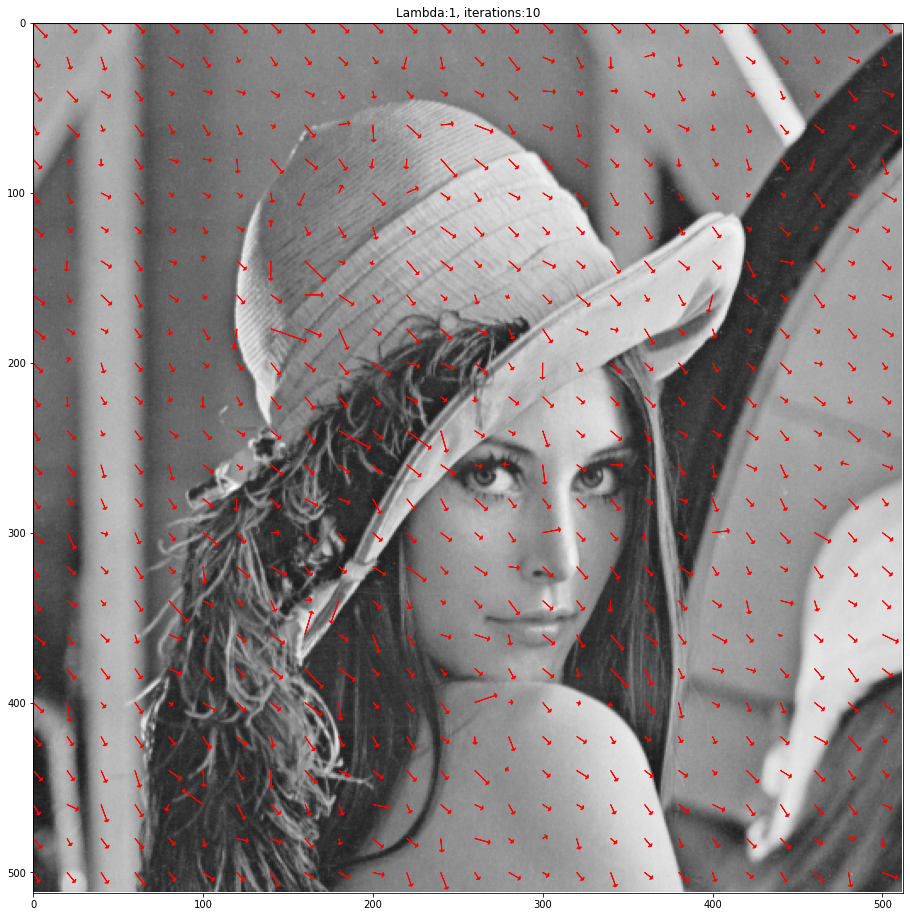

In [20]:
lam = 1
U, V = HornSchunck(lena, lena_shift, lam=lam, Niter=1800)

compareGraphs(U, V, lena_shift,lam=lam)

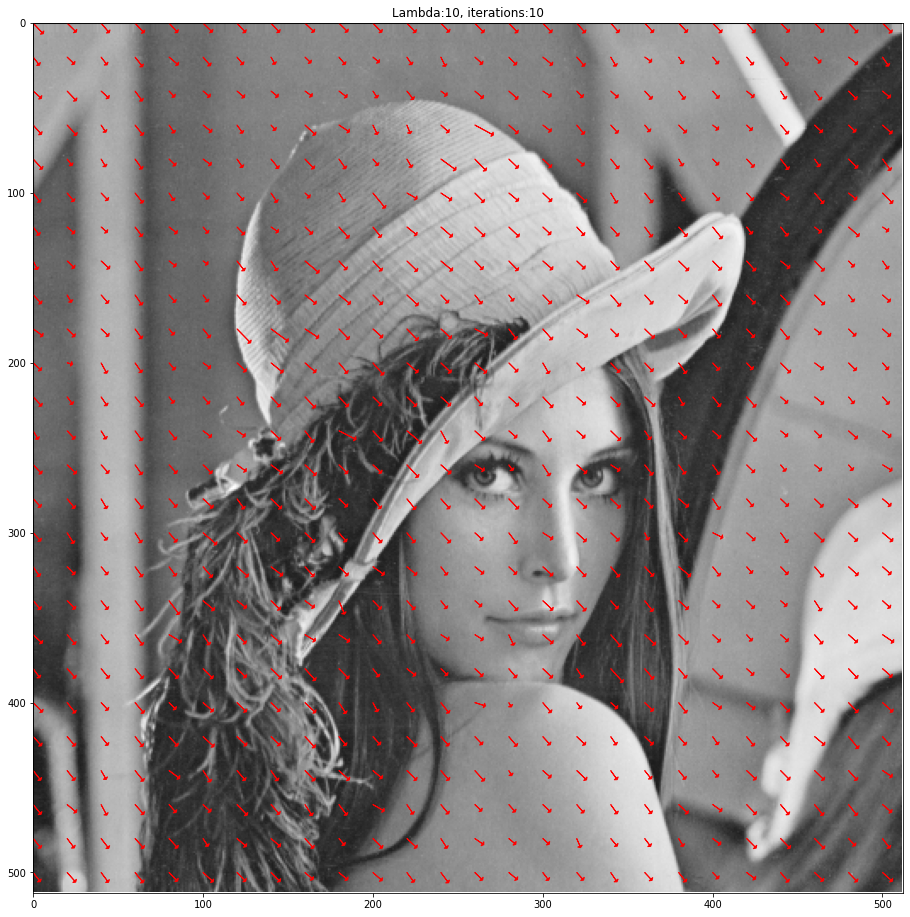

In [21]:
lam = 10
U, V = HornSchunck(lena, lena_shift, lam=lam, Niter=1800)

compareGraphs(U, V, lena_shift,lam=lam)